In [5]:
import keras

In [6]:
import numpy as no
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


0


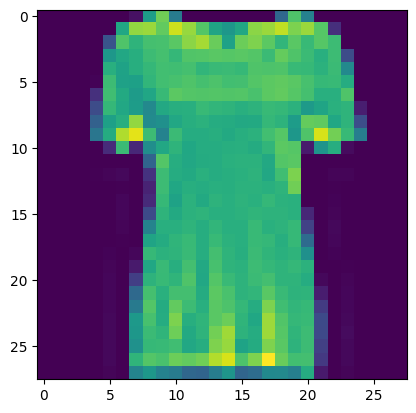

In [9]:
plt.imshow(train_X[10])
print(train_Y[10])

In [12]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [14]:
#preprocessing
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X =train_X.astype('float32')/255.0
test_X =test_X.astype('float32')/255.0

In [28]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print(train_Y[10])
print(train_Y_one_hot[10])

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Flatten,Conv2D, Dense, Dropout,LeakyReLU,MaxPooling2D
from sklearn.model_selection import train_test_split
X_valid, X_train, labels_valid, labels_train = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)


In [47]:
model = tf.keras.Sequential()


In [49]:
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [50]:
model.add(Conv2D(64, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [51]:
model.add(Conv2D(128, kernel_size=(3, 3),activation='linear',padding='same'))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))
model.add(tf.keras.layers.MaxPooling2D(2,2))

In [53]:
model.add(tf.keras.layers.Flatten())
model.add(Dense(128, activation='linear'))
model.add(tf.keras.layers.LeakyReLU(negative_slope=0.1))
model.add(Dense(10, activation='softmax'))

In [54]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])


In [57]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,794 (979.66 KB)

 Trainable params: 250,794 (979.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, labels_train, batch_size=64, epochs=27, verbose=1, validation_data=(X_valid,labels_valid))

Epoch 1/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 77s 387ms/step - accuracy: 0.6115 - loss: 1.0714 - val_accuracy: 0.8475 - val_loss: 0.4432
Epoch 2/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 70s 374ms/step - accuracy: 0.8406 - loss: 0.4443 - val_accuracy: 0.8638 - val_loss: 0.3754
Epoch 3/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 373ms/step - accuracy: 0.8703 - loss: 0.3564 - val_accuracy: 0.8686 - val_loss: 0.3605
Epoch 4/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 72s 384ms/step - accuracy: 0.8881 - loss: 0.2994 - val_accuracy: 0.8879 - val_loss: 0.3198
Epoch 5/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 374ms/step - accuracy: 0.9097 - loss: 0.2521 - val_accuracy: 0.8865 - val_loss: 0.3138
Epoch 6/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 373ms/step - accuracy: 0.9189 - loss: 0.2264 - val_accuracy: 0.9010 - val_loss: 0.2796
Epoch 7/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 384ms/step - accuracy: 0.9308 - loss: 0.1895 - val_accuracy: 0.8977 - val_loss: 0.2929
Epoch 8/27
188/188 ━━━━━━━━━━━━━━━━━━━━ 87s 410ms/step - accuracy: 0.9486 - loss: 0